In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model.model import ChatTime

/home/wcs/anaconda3/envs/Llama/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = ""

# ZSTSF

In [3]:
dataset = "Traffic"
hist_len = 120
pred_len = 24

df = pd.read_csv(f"./dataset/{dataset}.csv")
hist_data = np.array(df["Hist"].apply(eval).values.tolist())[:, -hist_len:][0]
pred_data = np.array(df["Pred"].apply(eval).values.tolist())[:, :pred_len][0]

model = ChatTime(hist_len=hist_len, pred_len=pred_len, model_path=model_path)

out = model.predict(hist_data)

Loading checkpoint shards: 100%|██████████████████| 3/3 [00:06<00:00,  2.19s/it]
We've detected an older driver with an RTX 4000 series GPU. These drivers have issues with P2P. This can affect the multi-gpu inference when using accelerate device_map.Please make sure to update your driver to the latest version which resolves this.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


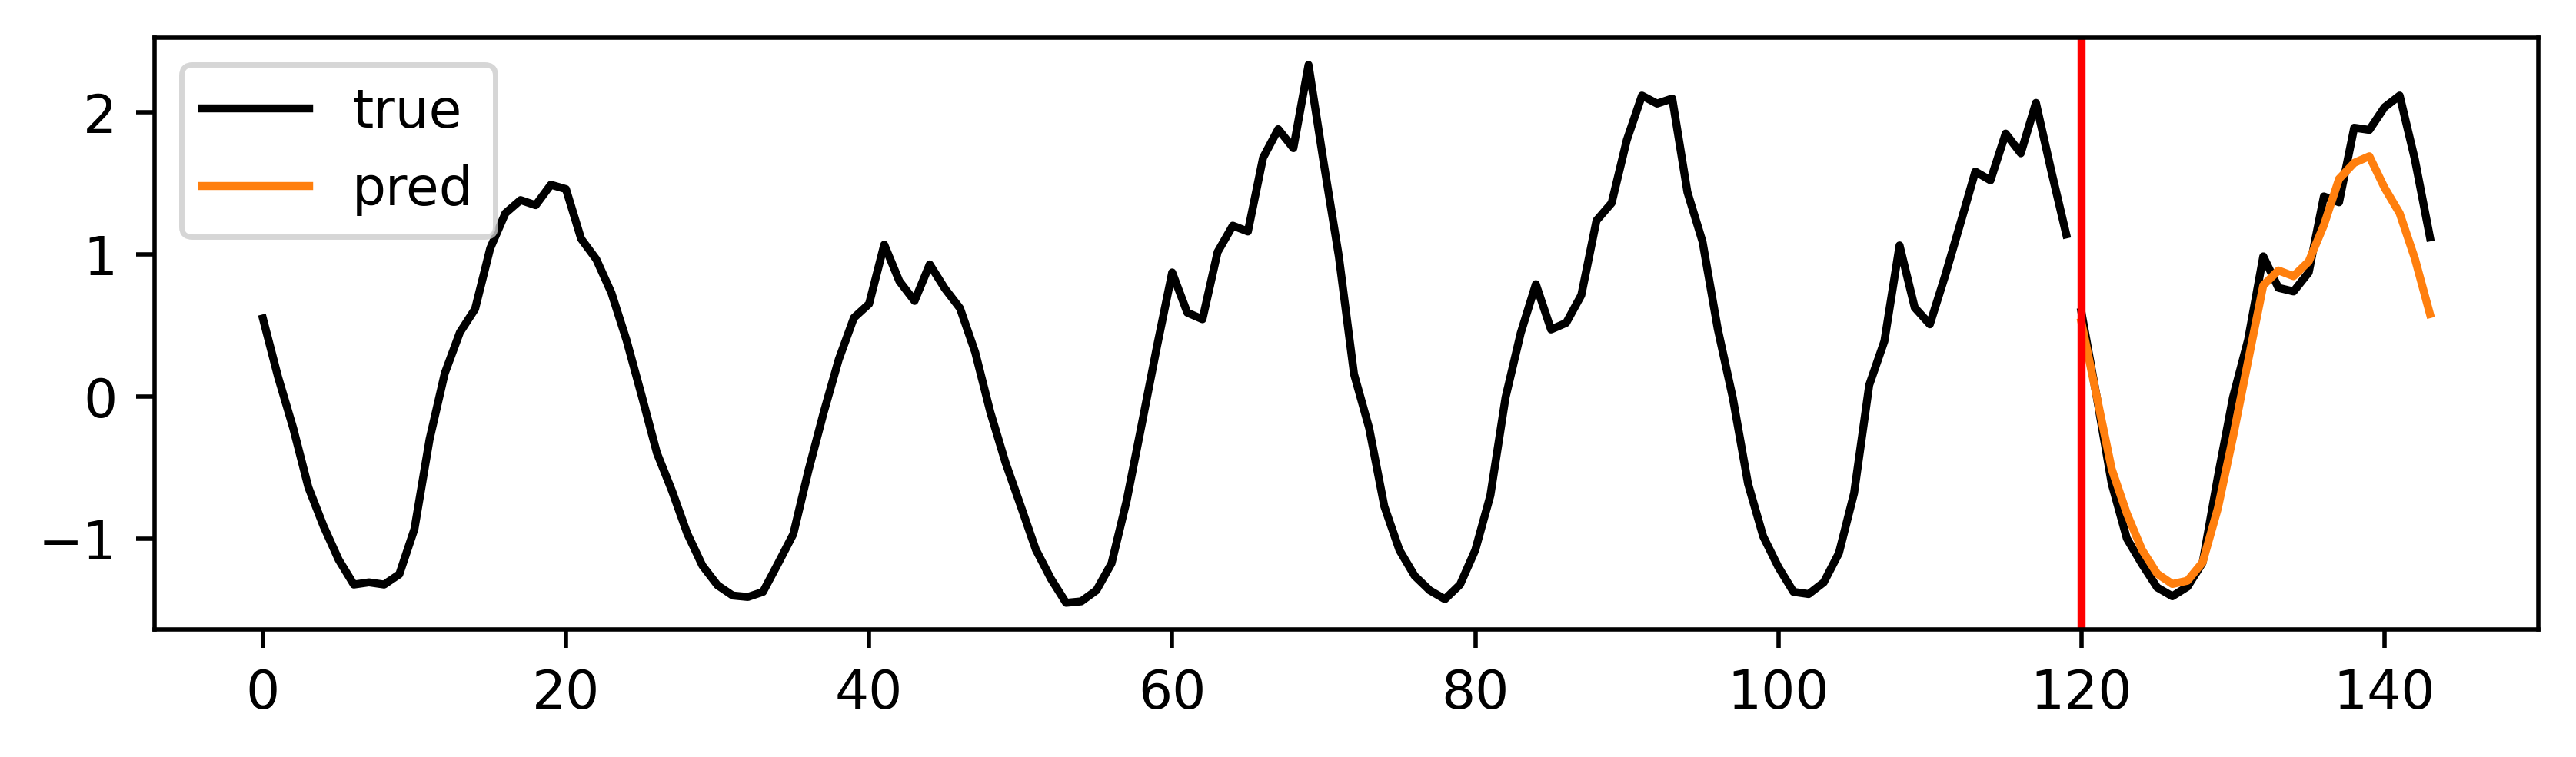

In [4]:
hist_x = np.linspace(0, hist_len-1, hist_len)
pred_x = np.linspace(hist_len, hist_len+pred_len-1, pred_len)

plt.figure(figsize=(8, 2), dpi=500)
plt.plot(hist_x, hist_data, color='#000000')
plt.plot(pred_x, pred_data, color='#000000', label='true')
plt.plot(pred_x, out, color='#FF7F0E', label='pred')
plt.axvline(hist_len, color='red')
plt.legend(loc="upper left")

# CGTSF

In [5]:
dataset = "PTF"
hist_len = 120
pred_len = 24

df = pd.read_csv(f"./dataset/{dataset}.csv")
hist_data = np.array(df["Hist"].apply(eval).values.tolist())[:, -hist_len:][0]
pred_data = np.array(df["Pred"].apply(eval).values.tolist())[:, :pred_len][0]
context = df["Text"].values[0]

model = ChatTime(hist_len=hist_len, pred_len=pred_len, model_path=model_path)

out_text = model.predict(hist_data, context)
out = model.predict(hist_data)

Loading checkpoint shards: 100%|██████████████████| 3/3 [00:06<00:00,  2.17s/it]
We've detected an older driver with an RTX 4000 series GPU. These drivers have issues with P2P. This can affect the multi-gpu inference when using accelerate device_map.Please make sure to update your driver to the latest version which resolves this.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


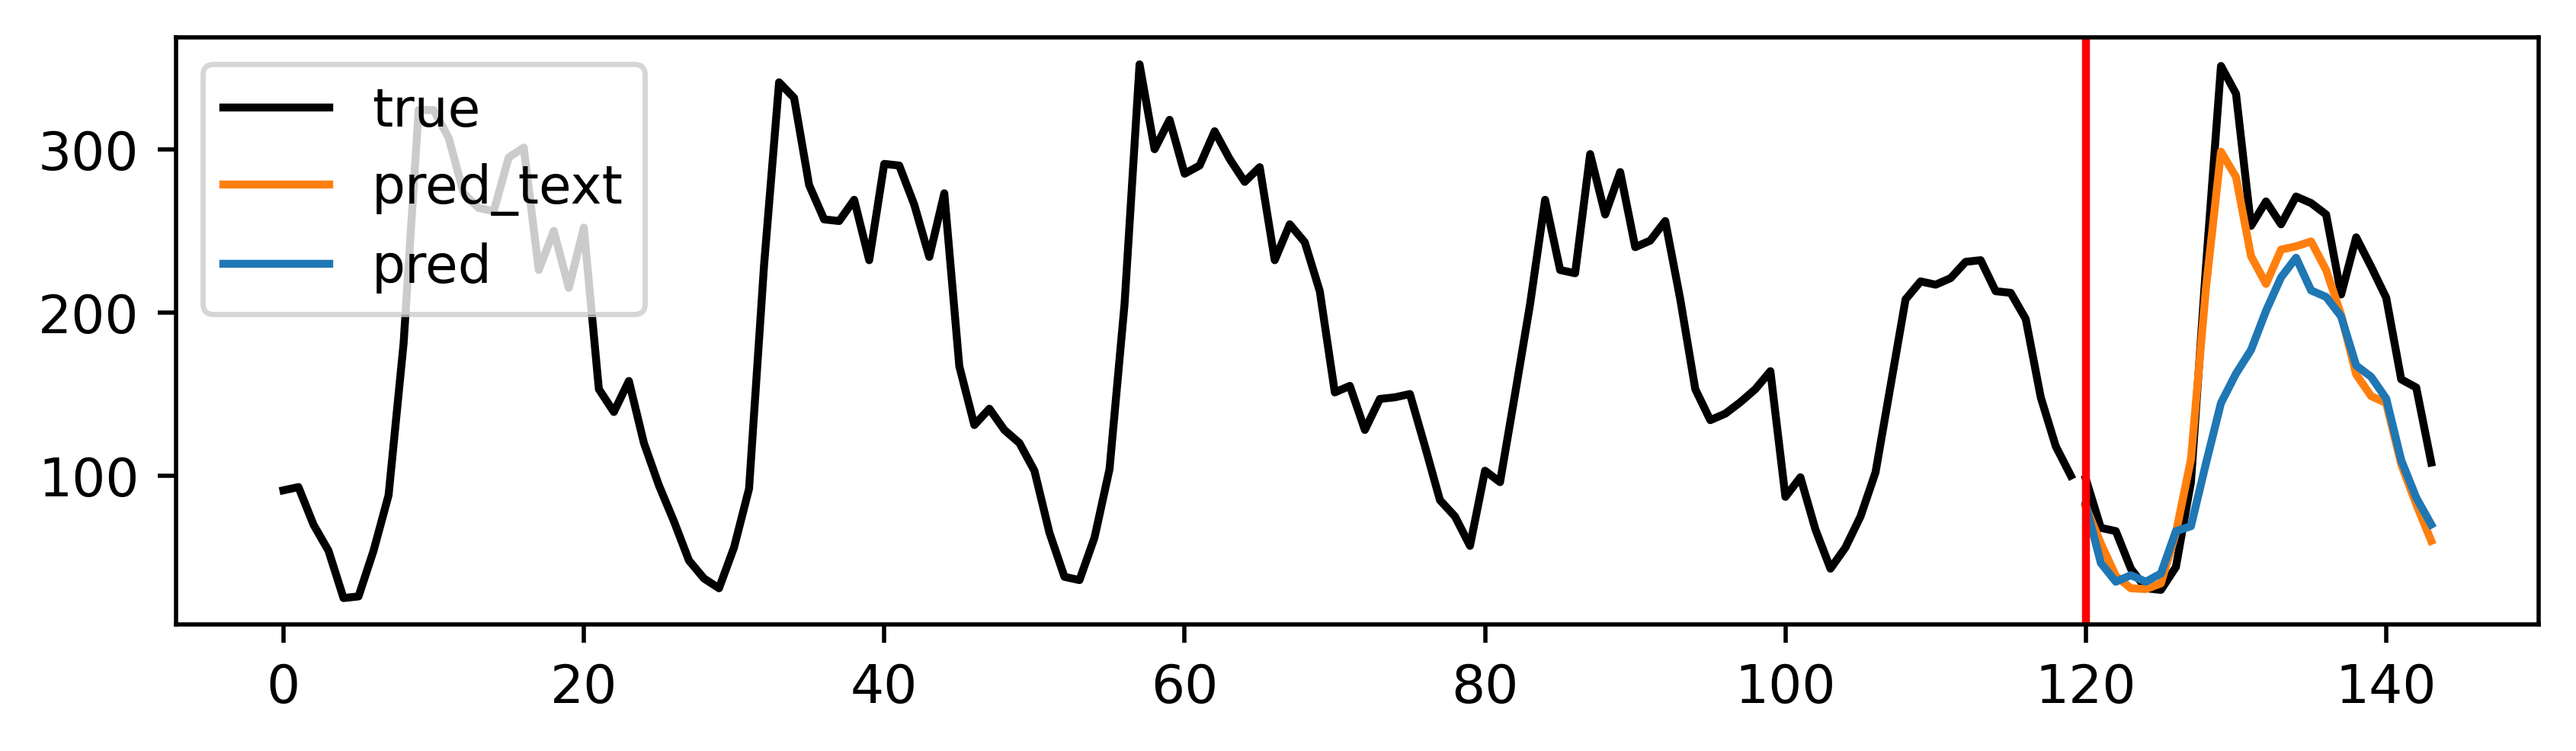

In [6]:
hist_x = np.linspace(0, hist_len-1, hist_len)
pred_x = np.linspace(hist_len, hist_len+pred_len-1, pred_len)

plt.figure(figsize=(8, 2), dpi=500)
plt.plot(hist_x, hist_data, color='#000000')
plt.plot(pred_x, pred_data, color='#000000', label='true')
plt.plot(pred_x, out_text, color='#FF7F0E', label='pred_text')
plt.plot(pred_x, out, color='#1F77B4', label='pred')
plt.axvline(hist_len, color='red')
plt.legend(loc="upper left")

# TSQA

In [7]:
dataset = "TSQA"

df = pd.read_csv(f"./dataset/{dataset}.csv")
series = np.array(df["Series"].apply(eval).values.tolist())[0]
question = df["Question"].values[0]
answer = df["Answer"].values[0]

model = ChatTime(model_path=model_path)

out = model.analyze(question, series)

Loading checkpoint shards: 100%|██████████████████| 3/3 [00:06<00:00,  2.25s/it]
We've detected an older driver with an RTX 4000 series GPU. These drivers have issues with P2P. This can affect the multi-gpu inference when using accelerate device_map.Please make sure to update your driver to the latest version which resolves this.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Given the following definitions:
Outlier: The data point that significantly differs from other observations in a time series.
Sudden spike: The rapid and significant increase in the value of a variable over a short period, followed by a return to the original baseline.
Level shift: The significant and sustained change in the average level of a time series.
Select one of the following answers that best describes the provided time series:
(a) This time series has no obvious outlier.
(b) This time series has a sudden spike.
(c) This time series has a level shift.
Only answer (a), (b), or (c).

(c) / (c)



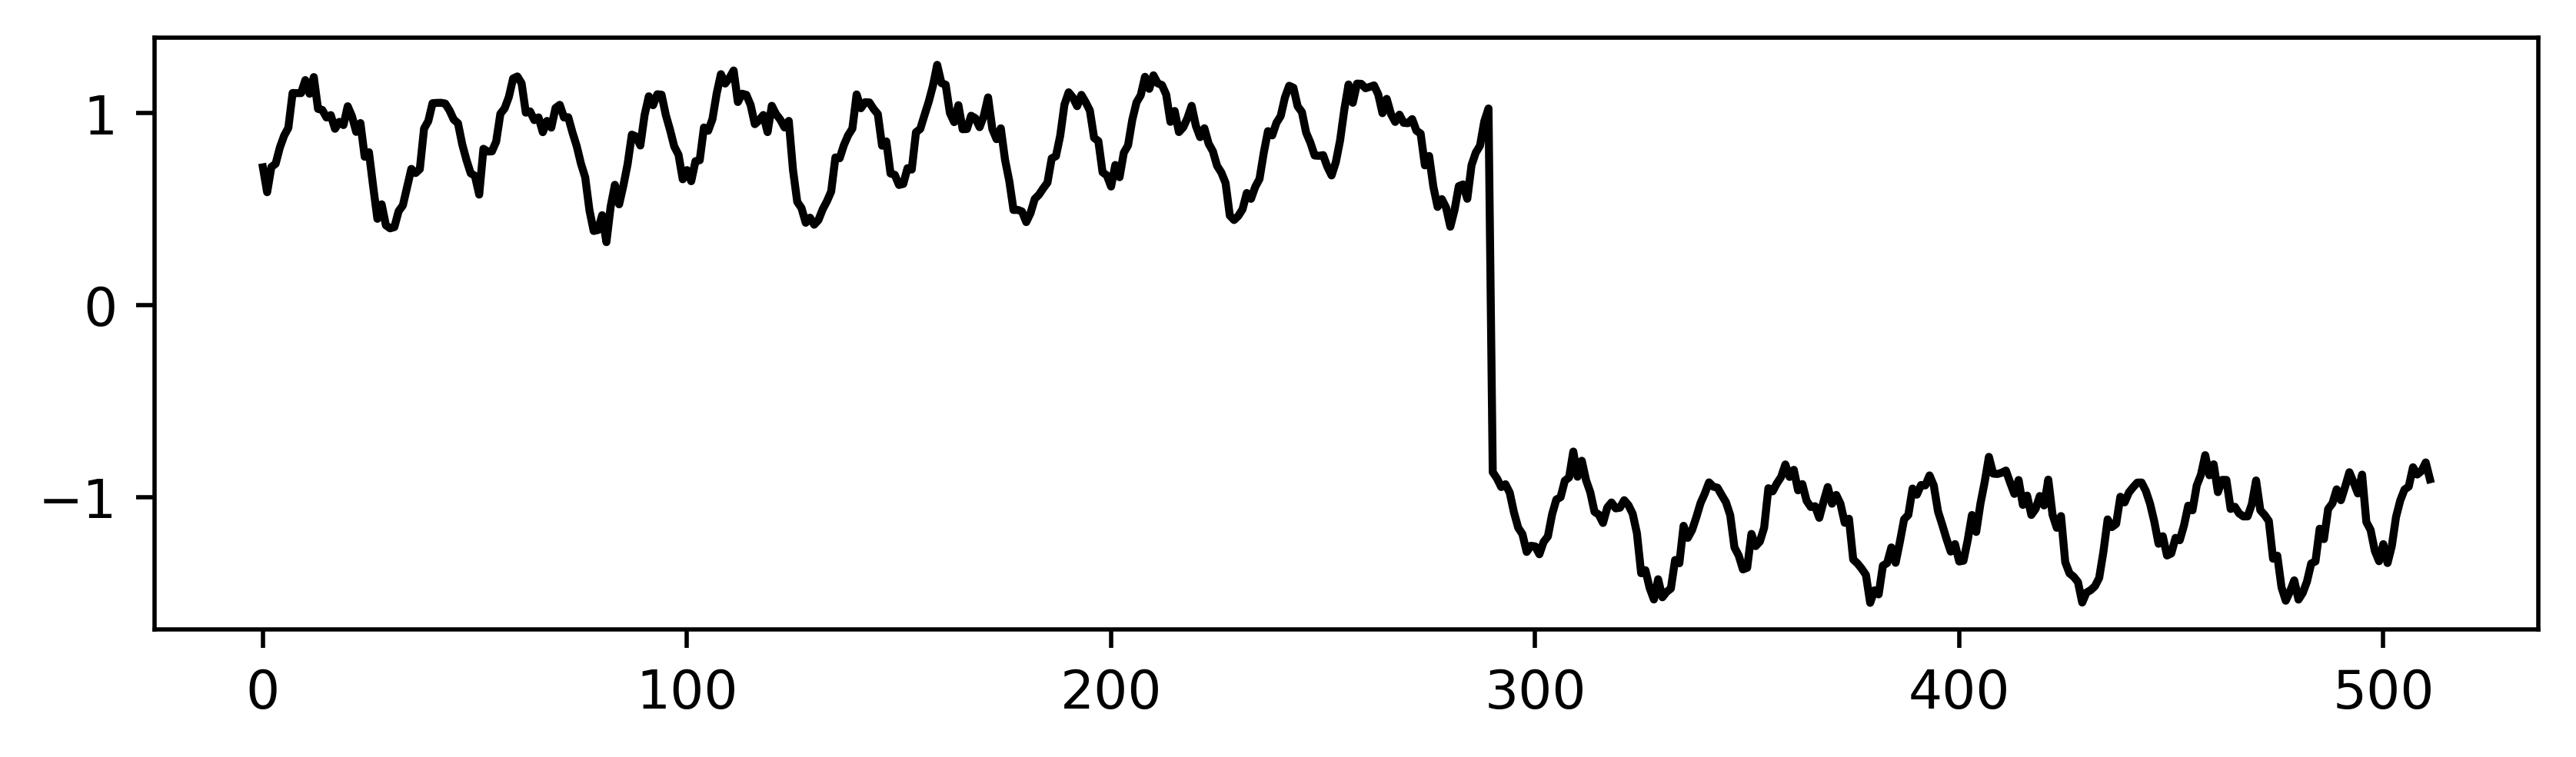

In [8]:
plt.figure(figsize=(8, 2), dpi=500)
plt.plot(series, color='#000000')

print(question)
print(f"\n{out} / {answer}\n")